# CapsNets on Fashion Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)
X_test = tf.expand_dims(X_test, axis=-1)

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

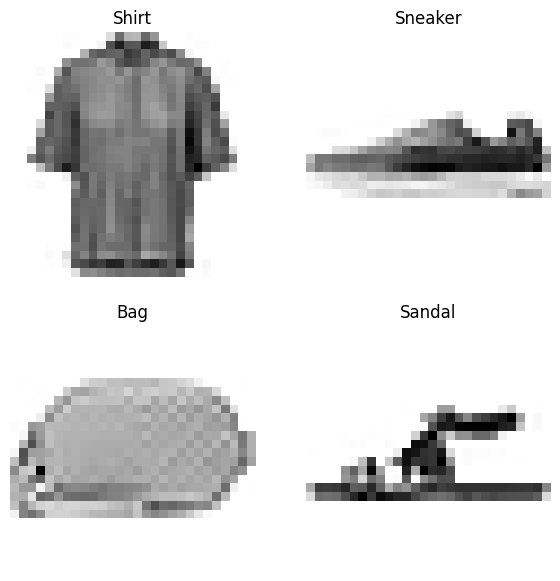

In [4]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [5]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [6]:
params = {
    "dataset": "Fashion-MNIST",
    "input_shape": (28, 28, 1),
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "train_metrics": ['accuracy', 'precision', 'recall', 'f1']
}

model = CapsNet(**params)
model.compile()
model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam())

Epoch 1/10: 100%|██████████| 16/16 [00:10<00:00,  3.28it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 10/10: 100%|██████████| 16/16 [00:05<00:00,  2.72it/s, Loss : 0.0014]


{'accuracy': ListWrapper([0.6376953125, 0.74609375, 0.779296875, 0.8037109375, 0.8447265625, 0.86328125, 0.87109375, 0.9111328125, 0.8984375, 0.9248046875]),
 'precision': ListWrapper([0.6256635904074767, 0.7800109939988992, 0.80022517428103, 0.8150209774014764, 0.856983306386349, 0.871349624031273, 0.8821143195249144, 0.9115027703127742, 0.9122427003024495, 0.9245263164489586]),
 'recall': ListWrapper([0.6376953125, 0.74609375, 0.779296875, 0.8037109375, 0.8447265625, 0.86328125, 0.87109375, 0.9111328125, 0.8984375, 0.9248046875]),
 'f1': ListWrapper([0.5881173628294648, 0.7329101332005994, 0.7618546274558546, 0.7932363935338231, 0.8420029608598844, 0.8611232933642734, 0.8627561065565142, 0.9099166150059982, 0.8959069904793227, 0.924243824076566]),
 'loss': ListWrapper([0.008959036, 0.003998336, 0.0029797908, 0.00256367, 0.0023047477, 0.0020389124, 0.0018485986, 0.0016848841, 0.0015229143, 0.0014241525])}

In [8]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/caps_net-Fashion-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/caps_net-Fashion-MNIST/assets


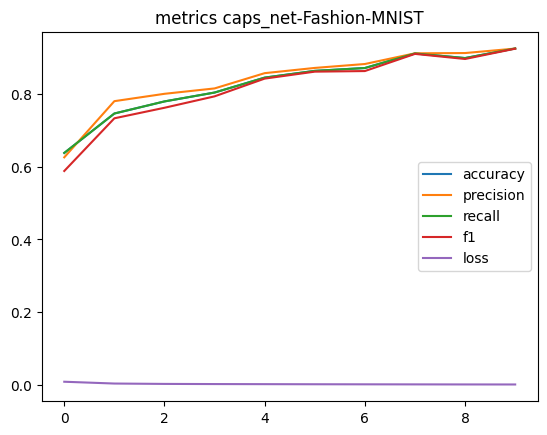

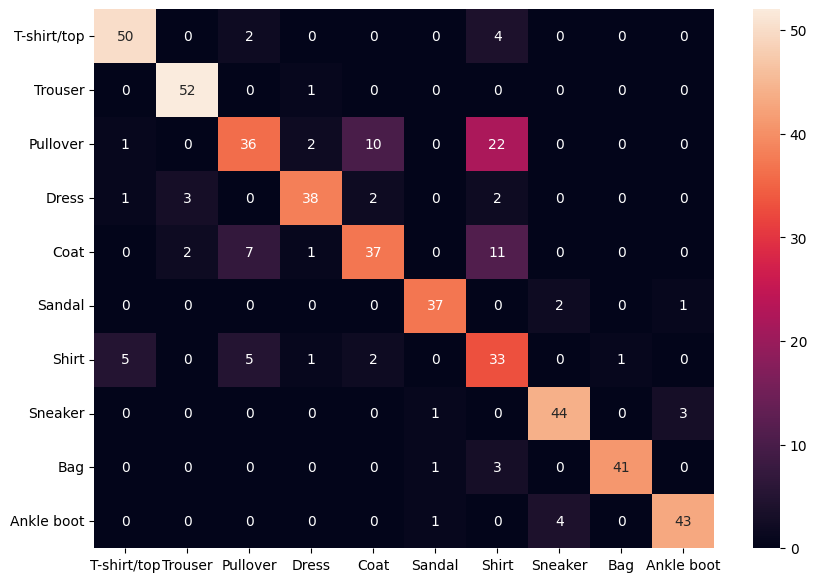

In [9]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [11]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net-Fashion-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense_2 (Dense)             multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
